# A description of the problem and a discussion of the background.

Nowadays, more and more people move to big cities, because those cities are more diversified, more convenient, and there are more job opportunities. Before moving, people want to know the living environment, so as to decide where is more suitable for living when there are multiple choices. I will explore New York City and the city of Toronto and compare the neighborhoods of the two cities and determine how similar or dissimilar they are. These two cities are the financial capitals of the U.S. and Canada respectly. By comparing the two cities can reflect the characteristics of the two. Thus, it can provide background information and suggestions for people who want to move.

# A description of the data and how it will be used to solve the problem.

The data contains postal code, boroughs, neighborhoods, latitude and	longitude. First, we can load and explore the data, and then tranform the data into a pandas dataframe, which can give us a general idea about the data. Second, create plots to show the information about New York City and the city of Toronto. Third, analyze each neighborhood. Thus, we can know how similar each neighborhood is, and how similar or dissimilar the two city are. Therefore, people can know which community is more suitable for them

# Import Libraries 

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                       

# New York 

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [4]:
neighborhoods_data = newyork_data['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [5]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [6]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [7]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [8]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [9]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [10]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [11]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [12]:
manhattan_data.loc[0, 'Neighborhood']
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


In [13]:
CLIENT_ID = '5MYEVFGVZNQ5SAGHUYTDMDEKZMZLFEZAWGPNWJJFDO5C2C1D' # your Foursquare ID
CLIENT_SECRET = 'UIYBV0XC2AAKQEHR5Q5IGRLPPWXCQ42I2NTRQJFMBGRF2YYV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f4136637f58eb2f2f1e5a84'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Marble Hill',
  'headerFullLocation': 'Marble Hill, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 76,
  'suggestedBounds': {'ne': {'lat': 40.88555078779965,
    'lng': -73.89877901972629},
   'sw': {'lat': 40.86755076979963, 'lng': -73.92254029753333}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4baf59e8f964a520a6f93be3',
       'name': 'Bikram Yoga',
       'location': {'address': '5500 Broadway',
        'crossStreet': '230th Street',
        'lat': 40.876843690797934,
        'lng': -73.9062038

# Toronto

In [14]:
from bs4 import BeautifulSoup
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(source, 'lxml')
table = soup.find("table")
table_rows = table.tbody.find_all("tr")

data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])

df = pd.DataFrame(data, columns=['PostalCode', 'Borough', 'Neighbourhood'])
df = df[~df['PostalCode'].isnull()]
df.drop(df[df['Borough']=="Not assigned"].index,axis=0, inplace=True)
df= df.groupby('PostalCode').agg(lambda x: ','.join(x))
df.loc[df['Neighbourhood']=="Not assigned",'Neighbourhood']=df.loc[df['Neighbourhood']=="Not assigned",'Borough']
df['Borough']= df['Borough'].str.replace('nan|[{}\s]','').str.split(',').apply(set).str.join(',').str.strip(',').str.replace(",{2,}",",")
df = df.reset_index()
df.head()

,PostalCode,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [15]:
df_geo = pd.read_csv("http://cocl.us/Geospatial_data")
df_geo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [16]:
df_toronto = pd.merge(df, df_geo, how='left', left_on = 'PostalCode', right_on = 'Postal Code')
df_toronto.drop("Postal Code", axis=1, inplace=True)
df_toronto.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [17]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [18]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [19]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [20]:
address = "Toronto, ON"

geolocator = Nominatim(user_agent="Toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto city are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto city are 43.6534817, -79.3839347.


In [21]:
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

In [22]:
df_toronto2 = df_toronto[df_toronto['Borough'].str.contains("Toronto")].reset_index(drop=True)
df_toronto2.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M4E,EastToronto,The Beaches,43.676357,-79.293031
1,M4K,EastToronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,EastToronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,EastToronto,Studio District,43.659526,-79.340923
4,M4N,CentralToronto,Lawrence Park,43.728020,-79.388790


In [23]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

map_Toronto2 = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto2)
    
map_Toronto2

In [24]:
CLIENT_ID = '5MYEVFGVZNQ5SAGHUYTDMDEKZMZLFEZAWGPNWJJFDO5C2C1D' # your Foursquare ID
CLIENT_SECRET = 'UIYBV0XC2AAKQEHR5Q5IGRLPPWXCQ42I2NTRQJFMBGRF2YYV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f4136fe4f3e540acfe332eb'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Marble Hill',
  'headerFullLocation': 'Marble Hill, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 76,
  'suggestedBounds': {'ne': {'lat': 40.88555078779965,
    'lng': -73.89877901972629},
   'sw': {'lat': 40.86755076979963, 'lng': -73.92254029753333}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4baf59e8f964a520a6f93be3',
       'name': 'Bikram Yoga',
       'location': {'address': '5500 Broadway',
        'crossStreet': '230th Street',
        'lat': 40.876843690797934,
        'lng': -73.9062038

# New York crime rates

In [25]:
import pandas as pd
!wget -O nycrimes.csv https://data.cityofnewyork.us/api/views/2fra-mtpn/rows.csv?accessType=DOWNLOAD


--2020-08-22 15:17:39--  https://data.cityofnewyork.us/api/views/2fra-mtpn/rows.csv?accessType=DOWNLOAD
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.140.205, 52.206.140.199, 52.206.68.26
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘nycrimes.csv’

    [                <=>                    ] 56,666,317  4.51MB/s   in 12s    

2020-08-22 15:17:52 (4.51 MB/s) - ‘nycrimes.csv’ saved [56666317]



In [26]:
df = pd.read_csv('nycrimes.csv')
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (8,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,JURIS_DESC,KY_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,OFNS_DESC,PARKS_NM,PD_CD,PD_DESC,PREM_TYP_DESC,RPT_DT,Lat_Lon,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,428569034,63,BROOKLYN,01/06/2020,00:00:00,01/06/2020,07:00:00,COMPLETED,NaN,N.Y. POLICE DEPT,107,FELONY,FRONT OF,BURGLARY,NaN,233.0,"BURGLARY,TRUCK NIGHT",OTHER,01/06/2020,POINT (-73.93271908899999 40.62888963700004),1002926,168402,40.628890,-73.932719
1,730098953,19,MANHATTAN,01/06/2020,22:00:00,01/06/2020,23:00:00,COMPLETED,NaN,N.Y. POLICE DEPT,341,MISDEMEANOR,NaN,PETIT LARCENY,NaN,349.0,"LARCENY,PETIT OF LICENSE PLATE",STREET,01/07/2020,POINT (-73.94567197099997 40.78195554300004),999296,224166,40.781956,-73.945672
2,934716271,73,NaN,02/05/2012,23:39:00,NaN,NaN,COMPLETED,NaN,N.Y. POLICE DEPT,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,NaN,NaN,02/12/2020,POINT (-73.91196656999995 40.65732259300006),1008676,178766,40.657323,-73.911967
3,752755335,42,BRONX,01/08/2020,12:00:00,01/08/2020,12:30:00,COMPLETED,NaN,N.Y. POLICE DEPT,578,VIOLATION,NaN,HARRASSMENT 2,NaN,638.0,"HARASSMENT,SUBD 3,4,5",STREET,01/10/2020,POINT (-73.90871090099995 40.82407474000007),1009516,239520,40.824075,-73.908711
4,991792394,13,MANHATTAN,01/07/2020,02:30:00,NaN,NaN,COMPLETED,NaN,N.Y. POLICE DEPT,107,FELONY,NaN,BURGLARY,NaN,233.0,"BURGLARY,TRUCK NIGHT",STREET,01/07/2020,POINT (-73.99381566299996 40.746626879000075),985964,211290,40.746627,-73.993816


In [27]:
# Strip leading & trailing whitespace
df.columns = df.columns.str.strip()

# Replace multiple spaces with a single space
df.columns = df.columns.str.replace('\s{2,}', ' ')

# Replace # with blank
df.columns = df.columns.str.replace('#', '')

# Replace spaces with _
df.columns = df.columns.str.replace(' ', '_')

# Convert to lowercase
df.columns = df.columns.str.lower()

In [28]:
df.dtypes

cmplnt_num             int64
addr_pct_cd            int64
boro_nm               object
cmplnt_fr_dt          object
cmplnt_fr_tm          object
cmplnt_to_dt          object
cmplnt_to_tm          object
crm_atpt_cptd_cd      object
hadevelopt            object
juris_desc            object
ky_cd                  int64
law_cat_cd            object
loc_of_occur_desc     object
ofns_desc             object
parks_nm              object
pd_cd                float64
pd_desc               object
prem_typ_desc         object
rpt_dt                object
lat_lon               object
x_coord_cd             int64
y_coord_cd             int64
latitude             float64
longitude            float64
dtype: object

In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Text(0.0, 1.0, 'New York')

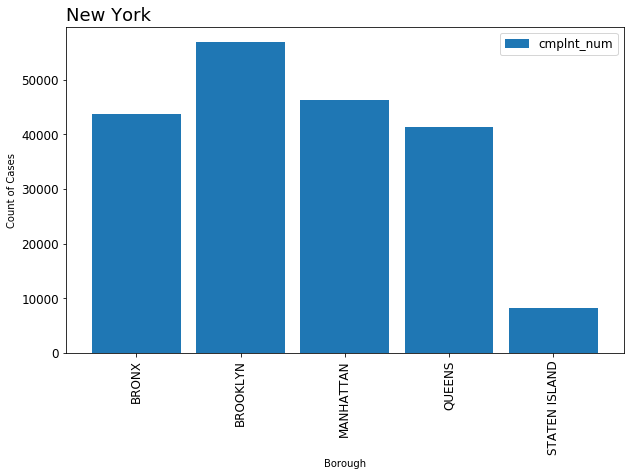

In [30]:
df.groupby('boro_nm').count().plot(y = 'cmplnt_num', 
                                      kind='bar',
                                      figsize=(10,6),
                                      width=0.85,
                                      fontsize=12,
                                      colormap='tab20').legend(bbox_to_anchor=(1,1),
                                                               prop={'size': 12})

plt.xlabel('Borough')
plt.ylabel('Count of Cases')
plt.title('New York', loc='left', fontsize=18)

# Toronto Crime Rate

In [16]:
import pandas as pd
df = pd.read_csv('https://prod-hub-indexer.s3.amazonaws.com/files/af500b5abb7240399853b35a2362d0c0/0/full/26717/af500b5abb7240399853b35a2362d0c0_0_full_26717.csv')

In [17]:
df.head()

,OBJECTID,Neighbourhood,Hood_ID,Population,Assault_2014,Assault_2015,Assault_2016,Assault_2017,Assault_2018,Assault_2019,...,TheftOver_2015,TheftOver_2016,TheftOver_2017,TheftOver_2018,TheftOver_2019,TheftOver_AVG,TheftOver_CHG,TheftOver_Rate_2019,Shape__Area,Shape__Length
0,1,Yonge-St.Clair,97,12528,20,29,39,27,34,37,...,5,8,0,3,6,4.3,1.00,47.9,1.161315e+06,5873.270582
1,2,York University Heights,27,27593,271,296,361,344,357,370,...,46,37,39,38,28,36.3,-0.26,101.5,1.324666e+07,18504.777326
2,3,Lansing-Westgate,38,16164,44,80,68,85,75,72,...,5,5,11,6,11,7.0,0.83,68.1,5.346186e+06,11112.109625
3,4,Yorkdale-Glen Park,31,14804,106,136,174,161,175,209,...,14,26,23,20,29,22.5,0.45,195.9,6.038326e+06,10079.426920
4,5,Stonegate-Queensway,16,25051,88,71,76,95,87,82,...,8,4,6,7,4,6.0,-0.43,16.0,7.946202e+06,11853.189878


In [18]:
df.dtypes

OBJECTID                     int64
Neighbourhood               object
Hood_ID                      int64
Population                   int64
Assault_2014                 int64
Assault_2015                 int64
Assault_2016                 int64
Assault_2017                 int64
Assault_2018                 int64
Assault_2019                 int64
Assault_AVG                float64
Assault_CHG                float64
Assault_Rate_2019          float64
AutoTheft_2014               int64
AutoTheft_2015               int64
AutoTheft_2016               int64
AutoTheft_2017               int64
AutoTheft_2018               int64
AutoTheft_2019               int64
AutoTheft_AVG              float64
AutoTheft_CHG              float64
AutoTheft_Rate_2019        float64
BreakandEnter_2014           int64
BreakandEnter_2015           int64
BreakandEnter_2016           int64
BreakandEnter_2017           int64
BreakandEnter_2018           int64
BreakandEnter_2019           int64
BreakandEnter_AVG   

In [19]:
# Strip leading & trailing whitespace
df.columns = df.columns.str.strip()

# Replace multiple spaces with a single space
df.columns = df.columns.str.replace('\s{2,}', ' ')

# Replace # with blank
df.columns = df.columns.str.replace('#', '')

# Replace spaces with _
df.columns = df.columns.str.replace(' ', '_')

# Convert to lowercase
df.columns = df.columns.str.lower()

Text(0.0, 1.0, 'Toronto')

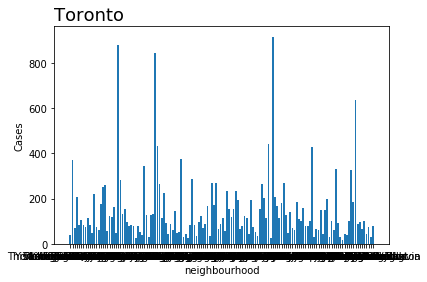

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax =plt.subplots()
ax.bar(df['neighbourhood'],df['assault_2019'])
                                    
plt.xlabel('neighbourhood')
plt.ylabel('Cases')
plt.title('Toronto', loc='left', fontsize=18)